In [1]:
import numpy             as np 
import pandas            as pd 
import matplotlib.pyplot as plt
import seaborn           as sns



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
lead = pd.read_csv(r"/data/notebook_files/Leads.csv")
pd.set_option('display.max_columns',None)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<Axes: >

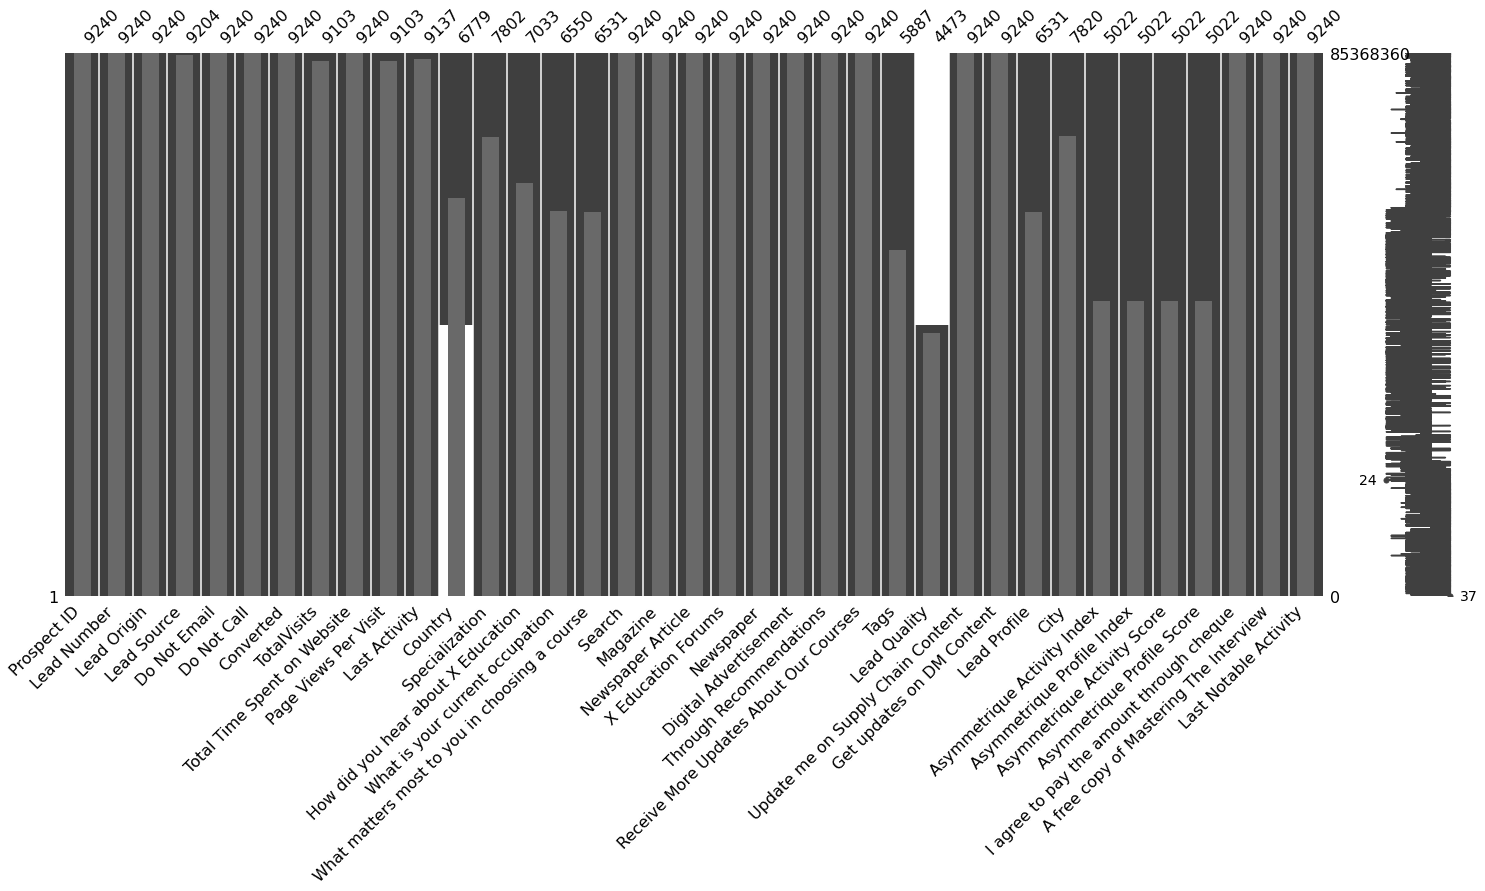

In [4]:
import missingno as msno
msno.matrix(lead)
msno.bar(lead)

In [5]:
def null_values_check(lead):
    null_values    = round((lead.isnull().sum()/len(lead) * 100),2).to_frame().rename(columns={0:'Null_values_percentage'})
    null_values    = pd.DataFrame(null_values)
    null_values.reset_index(inplace=True)
    return null_values.sort_values(by='Null_values_percentage',ascending=False)

In [6]:
def impute(df):
    from sklearn.impute import SimpleImputer
    my_imputer           = SimpleImputer(strategy='most_frequent')
    imputed_data         = pd.DataFrame(my_imputer.fit_transform(df))
    imputed_data.columns = df.columns
    return imputed_data

In [7]:
null_values_check(lead)[:17]

,index,Null_values_percentage
25,Lead Quality,51.59
30,Asymmetrique Activity Index,45.65
33,Asymmetrique Profile Score,45.65
32,Asymmetrique Activity Score,45.65
31,Asymmetrique Profile Index,45.65
24,Tags,36.29
28,Lead Profile,29.32
15,What matters most to you in choosing a course,29.32
14,What is your current occupation,29.11
11,Country,26.63


In [8]:
print('The shape of lead df before deleting columns:{}'.format(lead.shape))
col_eliminated = ['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score',
                 'Asymmetrique Activity Score','Asymmetrique Profile Index']
lead.drop(columns=col_eliminated,axis=1,inplace=True)
print('The shape of lead df after deleting columns:{}'.format(lead.shape))

The shape of lead df before deleting columns:(9240, 37)
The shape of lead df after deleting columns:(9240, 32)


In [9]:
lead['Lead Profile'].value_counts()

Select 4146
Potential Lead 1613
Other Leads 487
Student of SomeSchool 241
Lateral Student 24
Dual Specialization Student 20
Name: Lead Profile, dtype: int64

In [10]:
lead['City'].value_counts()

Mumbai 3222
Select 2249
Thane & Outskirts 752
Other Cities 686
Other Cities of Maharashtra 457
Other Metro Cities 380
Tier II Cities 74
Name: City, dtype: int64

In [11]:
lead['Specialization'].value_counts()

Select 1942
Finance Management 976
Human Resource Management 848
Marketing Management 838
Operations Management 503
Business Administration 403
IT Projects Management 366
Supply Chain Management 349
Banking, Investment And Insurance 338
Travel and Tourism 203
Media and Advertising 203
International Business 178
Healthcare Management 159
Hospitality Management 114
E-COMMERCE 112
Retail Management 100
Rural and Agribusiness 73
E-Business 57
Services Excellence 40
Name: Specialization, dtype: int64

In [12]:
lead['What is your current occupation'].value_counts()

Unemployed 5600
Working Professional 706
Student 210
Other 16
Housewife 10
Businessman 8
Name: What is your current occupation, dtype: int64

In [13]:
lead['Country'].value_counts()[:13]

India 6492
United States 69
United Arab Emirates 53
Singapore 24
Saudi Arabia 21
United Kingdom 15
Australia 13
Qatar 10
Hong Kong 7
Bahrain 7
Oman 6
France 6
unknown 5
Name: Country, dtype: int64

In [14]:
lead = impute(lead)

In [15]:
null_values_check(lead)[:5]

,index,Null_values_percentage
0,Prospect ID,0.0
1,Lead Number,0.0
30,A free copy of Mastering The Interview,0.0
29,I agree to pay the amount through cheque,0.0
28,City,0.0


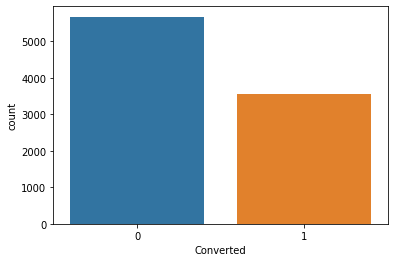

In [16]:
sns.countplot(x='Converted',data=lead);

In [17]:
round(lead['Converted'].value_counts()/len(lead['Converted'])*100,2)

0 61.46
1 38.54
Name: Converted, dtype: float64

In [18]:
#As converted leads less than non-converted leads hence its an imblance dataset  

In [19]:
def eda(col_name1,col_name2,df,l,b):
    plt.figure(figsize=(l,b))
    g = sns.countplot(x=col_name1,hue=col_name2,data=df)
    g.set_xticklabels(labels=g.get_xticklabels(),rotation=90);
    plt.legend(loc='upper right');

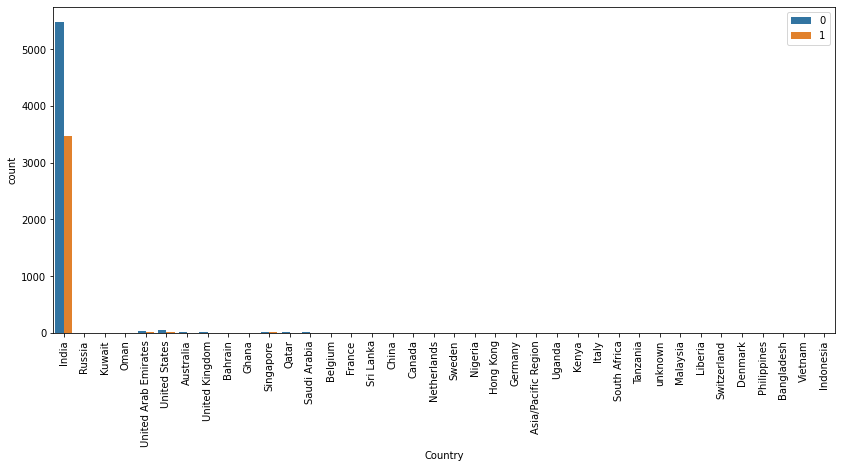

In [20]:
eda('Country','Converted',lead,14,6)

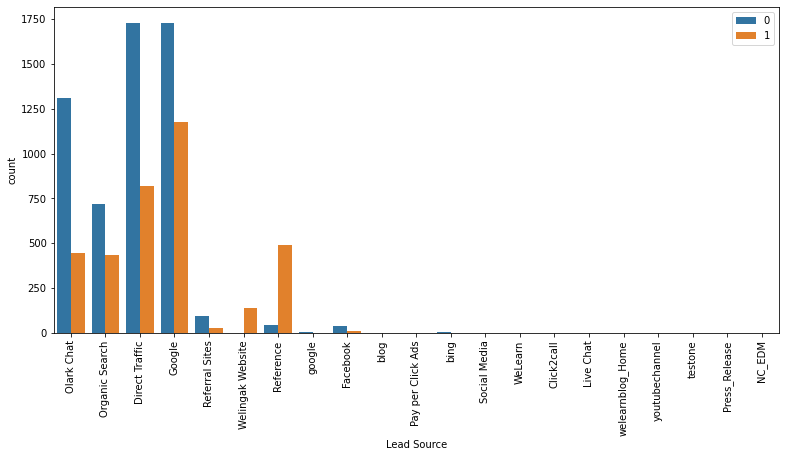

In [21]:
eda('Lead Source','Converted',lead,13,6)

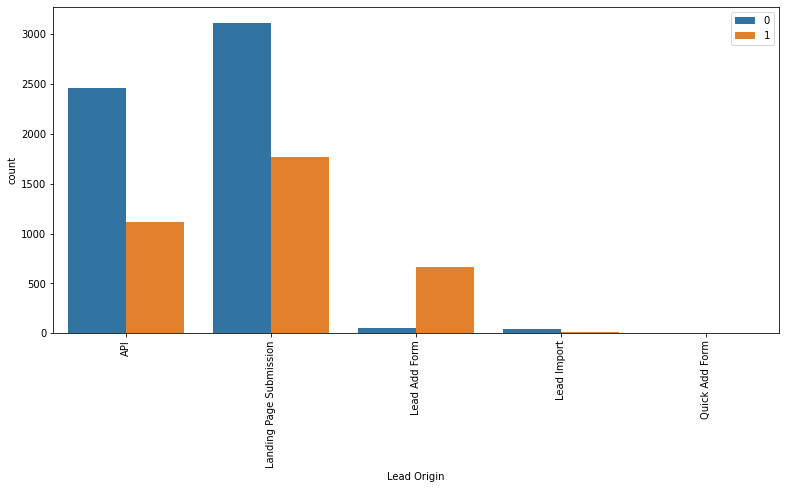

In [22]:
eda('Lead Origin','Converted',lead,13,6)

In [23]:
def analysing(col_name,df):
    unique   = df[col_name].unique()
    Analysis = pd.DataFrame(columns=[col_name,'1_per','0_per','1_count','0_count','Total'])
    Analysis[col_name] = unique
    for value in unique:
        Total_values = len(df[(df[col_name] == value)])
        Analysis.loc[Analysis[col_name] ==  value,'1_per']   = round((len(df[(df[col_name] == value) & (df['Converted'] == 1)])/Total_values)*100,2)
        Analysis.loc[Analysis[col_name] ==  value,'0_per']   = round((len(df[(df[col_name] == value) & (df['Converted'] == 0)])/Total_values)*100,2)
        Analysis.loc[Analysis[col_name] ==  value,'1_count'] = len(df[(df[col_name] == value) & (df['Converted'] == 1)])
        Analysis.loc[Analysis[col_name] ==  value,'0_count'] = len(df[(df[col_name] == value) & (df['Converted'] == 0)])
        Analysis.loc[Analysis[col_name] ==  value,'Total']   = Total_values
    return Analysis

In [24]:
Analysis_2 = analysing('Country',lead)
Analysis_2.sort_values(by='Total',ascending=False)[:15]

,Country,1_per,0_per,1_count,0_count,Total
0,India,38.84,61.16,3477,5476,8953
5,United States,26.09,73.91,18,51,69
4,United Arab Emirates,37.74,62.26,20,33,53
10,Singapore,45.83,54.17,11,13,24
12,Saudi Arabia,19.05,80.95,4,17,21
7,United Kingdom,33.33,66.67,5,10,15
6,Australia,23.08,76.92,3,10,13
11,Qatar,10.0,90.0,1,9,10
21,Hong Kong,57.14,42.86,4,3,7
8,Bahrain,57.14,42.86,4,3,7


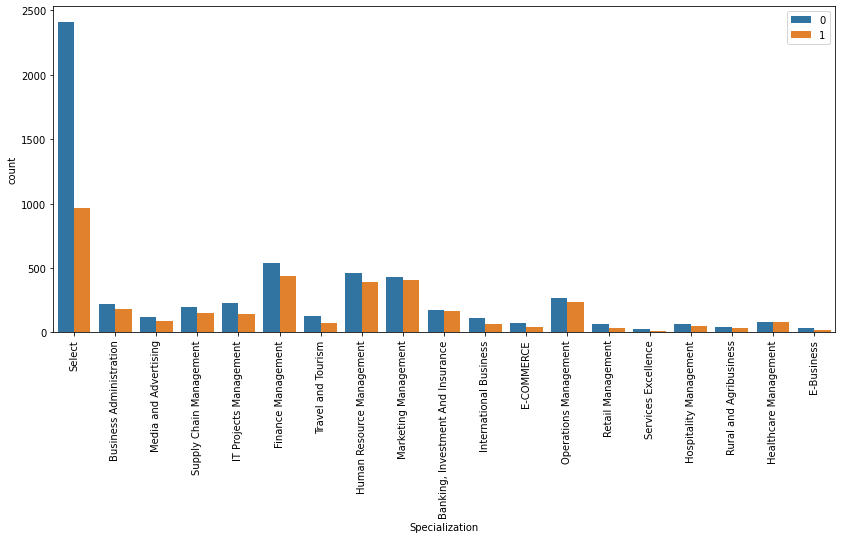

In [25]:
eda('Specialization','Converted',lead,14,6)

In [26]:
Analysis_3 = analysing('Specialization',lead)
Analysis_3.sort_values(by='1_count',ascending=False)

,Specialization,1_per,0_per,1_count,0_count,Total
0,Select,28.67,71.33,969,2411,3380
5,Finance Management,44.67,55.33,436,540,976
8,Marketing Management,48.69,51.31,408,430,838
7,Human Resource Management,45.75,54.25,388,460,848
12,Operations Management,47.32,52.68,238,265,503
1,Business Administration,44.42,55.58,179,224,403
9,"Banking, Investment And Insurance",49.41,50.59,167,171,338
3,Supply Chain Management,43.27,56.73,151,198,349
4,IT Projects Management,38.25,61.75,140,226,366
2,Media and Advertising,41.87,58.13,85,118,203


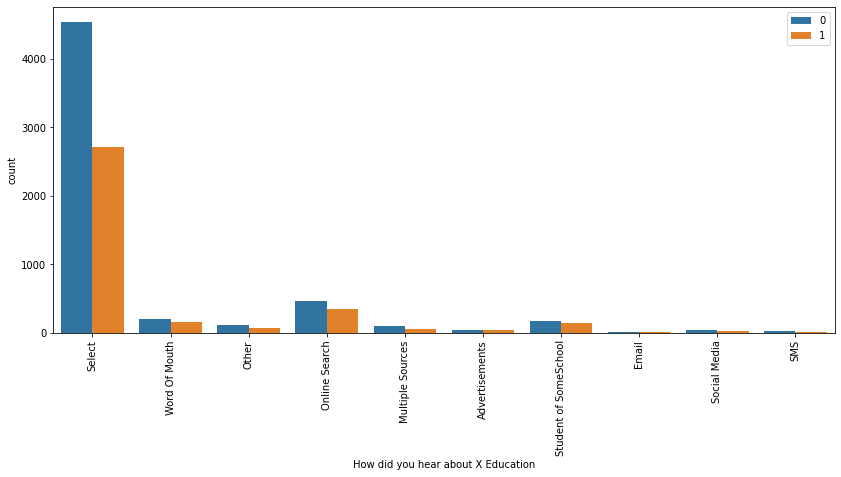

In [27]:
eda('How did you hear about X Education','Converted',lead,14,6)

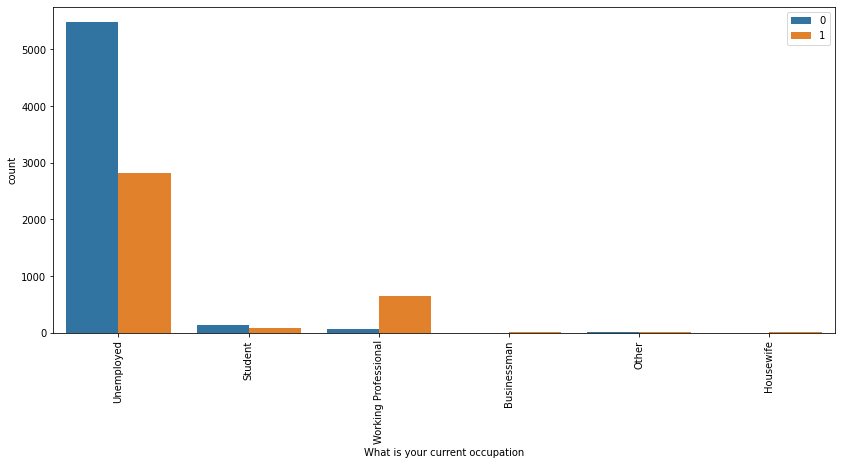

In [28]:
eda('What is your current occupation','Converted',lead,14,6)

In [29]:
Analysis_4 = analysing('What matters most to you in choosing a course',lead)
Analysis_4.sort_values(by='1_count',ascending=False)

,What matters most to you in choosing a course,1_per,0_per,1_count,0_count,Total
0,Better Career Prospects,38.54,61.46,3560,5677,9237
1,Flexibility & Convenience,50.0,50.0,1,1,2
2,Other,0.0,100.0,0,1,1


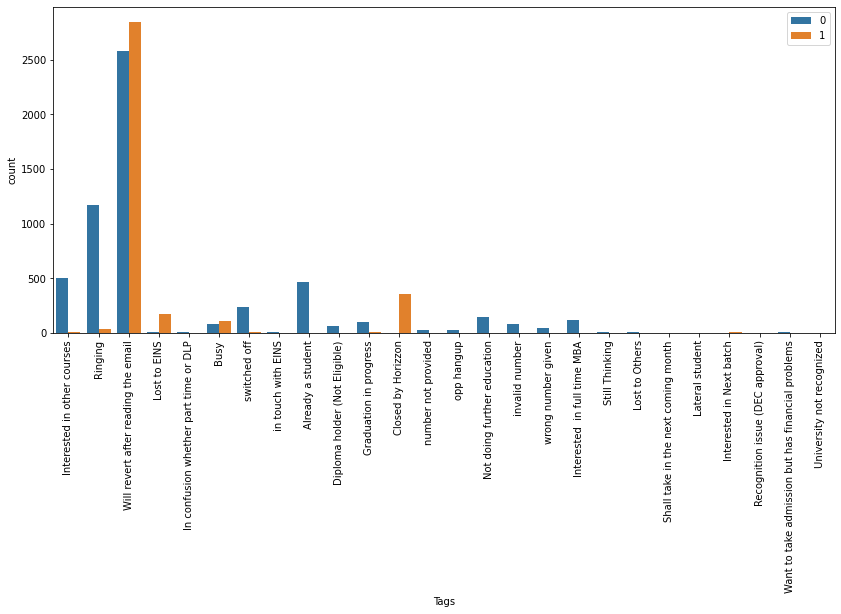

In [30]:
eda('Tags','Converted',lead,14,6)

In [31]:
Analysis_5 = analysing('Tags',lead)
Analysis_5.sort_values(by='Total',ascending=False)

,Tags,1_per,0_per,1_count,0_count,Total
2,Will revert after reading the email,52.41,47.59,2843,2582,5425
1,Ringing,2.83,97.17,34,1169,1203
0,Interested in other courses,2.53,97.47,13,500,513
8,Already a student,0.65,99.35,3,462,465
11,Closed by Horizzon,99.44,0.56,356,2,358
6,switched off,1.67,98.33,4,236,240
5,Busy,56.45,43.55,105,81,186
3,Lost to EINS,97.71,2.29,171,4,175
14,Not doing further education,0.69,99.31,1,144,145
17,Interested in full time MBA,2.56,97.44,3,114,117


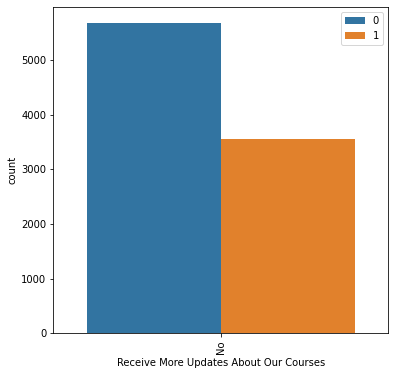

In [32]:
eda('Receive More Updates About Our Courses','Converted',lead,6,6)

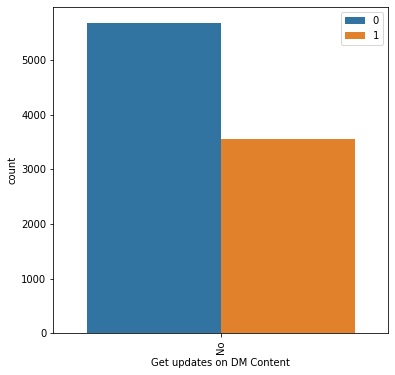

In [33]:
eda('Get updates on DM Content','Converted',lead,6,6)

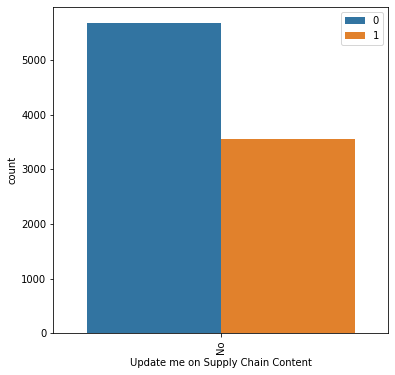

In [34]:
eda('Update me on Supply Chain Content','Converted',lead,6,6)

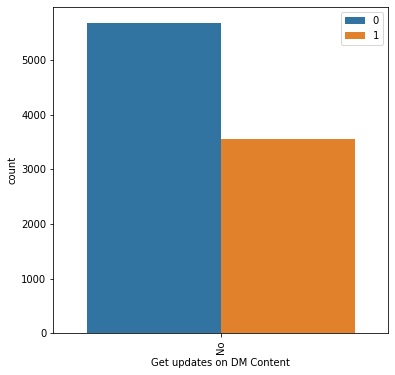

In [35]:
eda('Get updates on DM Content','Converted',lead,6,6)

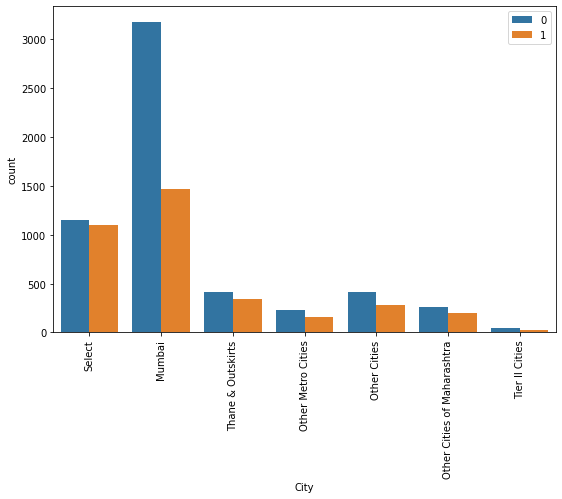

In [36]:
eda('City','Converted',lead,9,6)

In [37]:
Analysis_6 = analysing('Last Notable Activity',lead)
Analysis_6.sort_values(by='Total',ascending=False)

,Last Notable Activity,1_per,0_per,1_count,0_count,Total
0,Modified,22.98,77.02,783,2624,3407
1,Email Opened,36.93,63.07,1044,1783,2827
9,SMS Sent,69.43,30.57,1508,664,2172
2,Page Visited on Website,29.25,70.75,93,225,318
8,Olark Chat Conversation,13.66,86.34,25,158,183
4,Email Link Clicked,26.01,73.99,45,128,173
3,Email Bounced,15.0,85.0,9,51,60
6,Unsubscribed,29.79,70.21,14,33,47
5,Unreachable,68.75,31.25,22,10,32
7,Had a Phone Conversation,92.86,7.14,13,1,14


In [38]:
Analysis_7 = analysing('Last Activity',lead)
Analysis_7.sort_values(by='Total',ascending=False)

,Last Activity,1_per,0_per,1_count,0_count,Total
1,Email Opened,37.68,62.32,1334,2206,3540
12,SMS Sent,62.91,37.09,1727,1018,2745
4,Olark Chat Conversation,8.63,91.37,84,889,973
0,Page Visited on Website,23.59,76.41,151,489,640
3,Converted to Lead,12.62,87.38,54,374,428
5,Email Bounced,7.98,92.02,26,300,326
6,Email Link Clicked,27.34,72.66,73,194,267
7,Form Submitted on Website,24.14,75.86,28,88,116
2,Unreachable,33.33,66.67,31,62,93
8,Unsubscribed,26.23,73.77,16,45,61


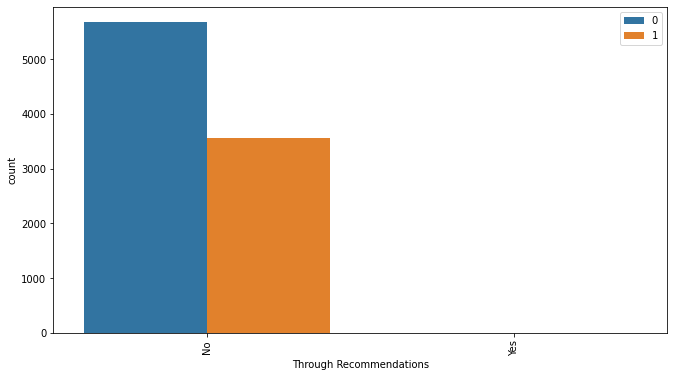

In [39]:
eda('Through Recommendations','Converted',lead,11,6)

In [40]:
Analysis_7 = analysing('Through Recommendations',lead)
Analysis_7.sort_values(by='Total',ascending=False)

,Through Recommendations,1_per,0_per,1_count,0_count,Total
0,No,38.51,61.49,3556,5677,9233
1,Yes,71.43,28.57,5,2,7


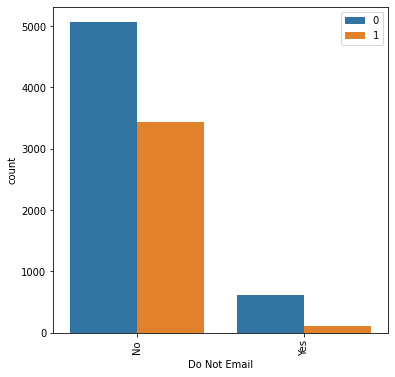

In [41]:
eda('Do Not Email','Converted',lead,6,6)

In [42]:
Analysis_8 = analysing('Do Not Email',lead)
Analysis_8.sort_values(by='Total',ascending=False)

,Do Not Email,1_per,0_per,1_count,0_count,Total
0,No,40.48,59.52,3443,5063,8506
1,Yes,16.08,83.92,118,616,734


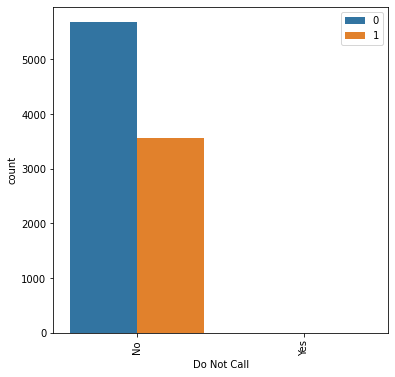

In [43]:
eda('Do Not Call','Converted',lead,6,6)

In [44]:
Analysis_9 = analysing('Do Not Call',lead)
Analysis_9.sort_values(by='Total',ascending=False)

,Do Not Call,1_per,0_per,1_count,0_count,Total
0,No,38.53,61.47,3559,5679,9238
1,Yes,100.0,0.0,2,0,2


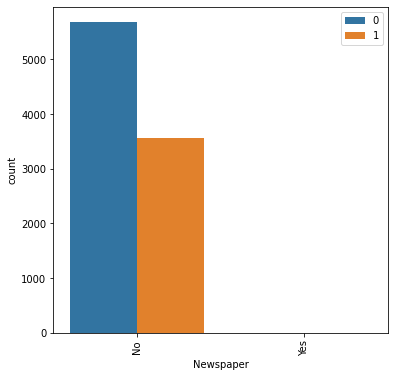

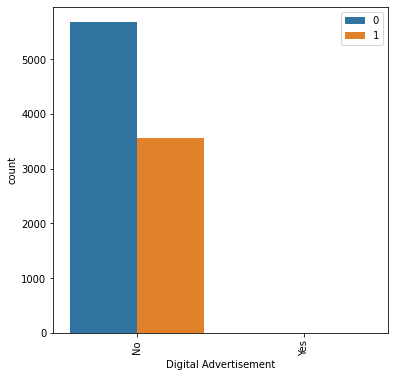

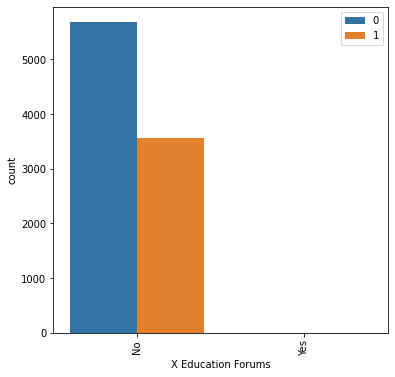

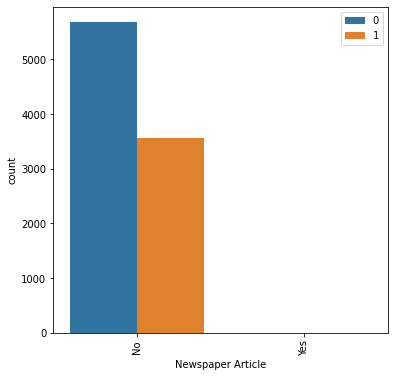

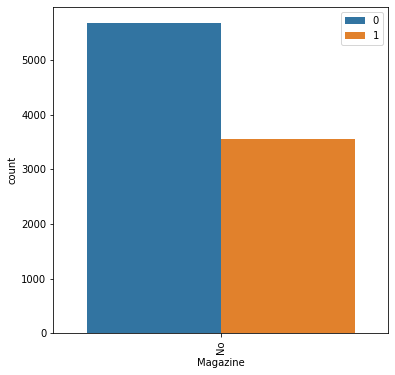

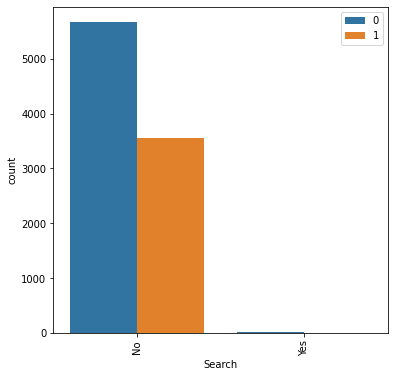

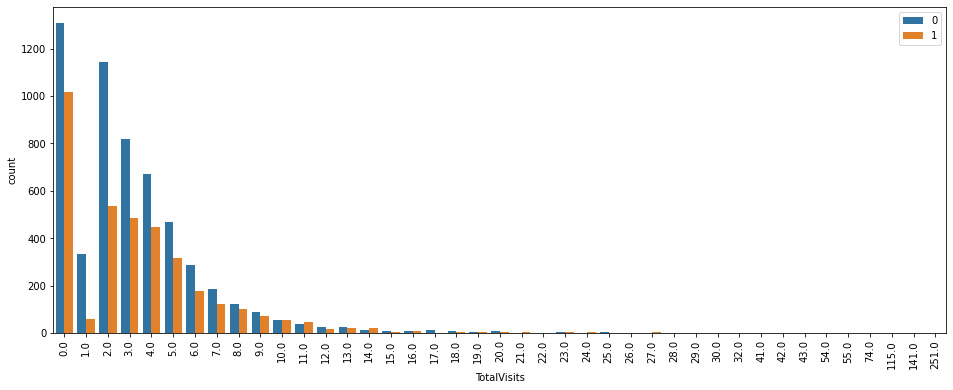

In [45]:
eda('Newspaper','Converted',lead,6,6)
eda('Digital Advertisement','Converted',lead,6,6)
eda('X Education Forums','Converted',lead,6,6)
eda('Newspaper Article','Converted',lead,6,6)
eda('Magazine','Converted',lead,6,6)
eda('Search','Converted',lead,6,6)
eda('TotalVisits','Converted',lead,16,6)

In [46]:
lead['ad'] = lead['Digital Advertisement'] + lead['Newspaper'] + lead['X Education Forums']+ lead['Newspaper Article'] + lead['Magazine'] + lead['Search']
lead['ad'].value_counts()

NoNoNoNoNoNo 9221
NoNoNoNoNoYes 13
YesNoNoNoNoNo 3
NoYesNoNoNoNo 1
YesNoYesYesNoYes 1
NoNoNoYesNoNo 1
Name: ad, dtype: int64

In [47]:
col_to_be_eliminated = ['What matters most to you in choosing a course','Receive More Updates About Our Courses',
                       'Update me on Supply Chain Content','Get updates on DM Content',
                       'I agree to pay the amount through cheque','Through Recommendations','Do Not Email',
                       'Do Not Call','Digital Advertisement','Newspaper','X Education Forums',
                       'Newspaper Article','Magazine','Search','ad']
print('The shape of df before deleting reduntant columns: {}'.format(lead.shape))
print('The no of columns to be removed:{}'.format(len(col_to_be_eliminated)))
lead.drop(columns=col_to_be_eliminated,axis=1,inplace=True)
print('The shape of df after  deleting reduntant columns: {}'.format(lead.shape))

The shape of df before deleting reduntant columns: (9240, 33)
The no of columns to be removed:15
The shape of df after  deleting reduntant columns: (9240, 18)


In [48]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Select,Select,Unemployed,Interested in other courses,Select,Select,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Ringing,Select,Select,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Select,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Will revert after reading the email,Select,Mumbai,No,Modified


In [49]:
lead = lead.apply(pd.to_numeric, errors='ignore')

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list        = lead.select_dtypes('O').columns

#Printing the no of categorical columns before conversion 
print('Before LabelEncoding')
print('The no of categorical columns in dataset are {}'.format(len(lead.select_dtypes('O').columns)))

#Converting the cat columns into numerical 
for column_name in cat_list:
    lead[column_name] = le.fit_transform(lead[column_name])

#Printing the no of categorical columns before conversion 
print('---'*30)
print('After LabelEncoding')
print('The no of categorical columns in dataset are {}'.format(len(lead.select_dtypes('O').columns)))

Before LabelEncoding
The no of categorical columns in dataset are 13
------------------------------------------------------------------------------------------
After LabelEncoding
The no of categorical columns in dataset are 0


In [51]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,4427,660737,0,6,0,0.0,0,0.0,10,12,15,6,4,8,4,4,0,8
1,1554,660728,0,7,0,5.0,674,2.5,5,12,15,6,4,14,4,4,0,4
2,5140,660727,1,1,1,2.0,1532,2.0,5,12,1,6,3,19,3,0,1,4
3,467,660719,1,1,0,1.0,305,1.0,13,12,11,9,4,14,4,0,0,8
4,1874,660681,1,3,1,2.0,1428,1.0,1,12,15,4,4,19,4,0,0,8


In [52]:
from sklearn.model_selection import train_test_split
col_list = ['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source','TotalVisits', 
          'Total Time Spent on Website', 'Page Views Per Visit','Last Activity', 'Country', 
          'Specialization','How did you hear about X Education', 'What is your current occupation',
          'Tags', 'Lead Profile', 'City','A free copy of Mastering The Interview', 
          'Last Notable Activity'] 

X = lead[col_list].copy()
y = lead['Converted'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

<Axes: >

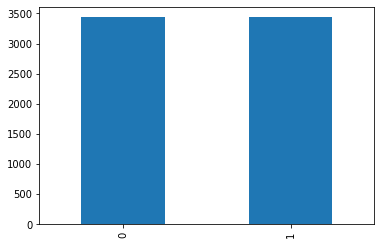

In [53]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())
pd.Series(y_train_new).value_counts().plot.bar()

In [54]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

X_train_new = pd.DataFrame(SS.fit_transform(X_train_new), columns=X_train_new.columns, index=X_train_new.index)
X_test      = pd.DataFrame(SS.transform(X_test), columns=X_test.columns, index=X_test.index)

In [55]:
def prediction(model_name,x_test,y_test,thre):
    y_pred                        = model_name.predict(x_test)
    y_pred_final                  = pd.DataFrame({'train_Prob':y_pred})
    y_pred_final['real_op']       = y_test
    y_pred_final['pred_op']       = y_pred_final['train_Prob'].apply(lambda x:1 if x>thre else 0)
    return y_pred_final

In [56]:
def validating_lr(y_real,y_pred):
    from sklearn.metrics import confusion_matrix, accuracy_score
    import seaborn as sns
    confusion = confusion_matrix(y_pred,y_real)
    sns.heatmap(confusion,annot=True,fmt='',cmap='Blues')
    print('Accuracy Score',(accuracy_score(y_pred,y_real)*100))
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    TPR = round(((TP / float(TP+FP)*100)),2)
    FPR = round(((FP/ float(TN+FP)*100)),2)
    #print('True Positive rate                         :',round((TP / float(TP+FP)*100)),2)
    #print('False postive rate(predicting 1 when its 0):',round((FP/ float(TN+FP)*100)),2)
    print('True Positive rate                         :{}'.format(TPR))
    print('False postive rate(predicting 1 when its 0):{}'.format(FPR))
    print('\n')
    #print('Negative predictive value:',(TN / float(TN+ FN)*100))

In [57]:
def draw_roc( actual, probs ):
    from sklearn.metrics import roc_curve,roc_auc_score
    fpr, tpr, thresholds = roc_curve( actual, probs,drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None
    fpr, tpr, thresholds = roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
    draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [58]:
def vif_validation(X_train):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features']  = X_train.columns
    vif['VIF']       = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF']       = round(vif['VIF'], 2)
    vif              = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [59]:
import statsmodels.api as sm

#Features for model no 1
fcol_list = ['Lead Number', 'Lead Origin', 'Lead Source','TotalVisits', 
          'Total Time Spent on Website', 'Page Views Per Visit','Last Activity', 'Country', 
          'Specialization','How did you hear about X Education', 'What is your current occupation',
          'Tags', 'Lead Profile', 'City','A free copy of Mastering The Interview', 
          'Last Notable Activity']

#Adding constants 
X_train_new_sm = sm.add_constant(X_train_new[fcol_list])
lr   = sm.GLM(y_train_new,X_train_new_sm, family = sm.families.Binomial())
lr_1 = lr.fit() 
lr_1.summary()

Generalized Linear Model Regression Results 
 
 Dep. Variable: y No. Observations: 6868 
 
 
 Model: GLM Df Residuals: 6851 
 
 
 Model Family: Binomial Df Model: 16 
 
 
 Link Function: Logit Scale: 1.0000 
 
 
 Method: IRLS Log-Likelihood: -3215.9 
 
 
 Date: Fri, 26 May 2023 Deviance: 6431.8 
 
 
 Time: 14:32:04 Pearson chi2: 7.63e+03 
 
 
 No. Iterations: 5 Pseudo R-squ. (CS): 0.3622 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 const 0.0639 0.031 2.043 0.041 0.003 0.125 
 
 
 Lead Number 0.0914 0.032 2.885 0.004 0.029 0.154 
 
 
 Lead Origin 0.2383 0.036 6.678 0.000 0.168 0.308 
 
 
 Lead Source 0.4466 0.037 12.005 0.000 0.374 0.519 
 
 
 TotalVisits 0.0937 0.038 2.475 0.013 0.019 0.168 
 
 
 Total Time Spent on Website 1.1282 0.038 29.703 0.000 1.054 1.203 
 
 
 Page Views Per Visit -0.3715 0.042 -8.947 0.000 -0.453 -0.290 
 
 
 Last Activity 0.3972 0.050 7.873 0.000 0.298 0.496 
 
 
 Country -0.0339 0.032 -1.055 0.291 -0.097 0.029 
 
 
 Specialization -0.2639 0.037 -7.184 0.000 -0.336 -0.192 
 
 
 How did you hear about X Education 0.0518 0.031 1.656 0.098 -0.009 0.113 
 
 
 What is your current occupation 0.1432 0.034 4.201 0.000 0.076 0.210 
 
 
 Tags 0.3560 0.034 10.318 0.000 0.288 0.424 
 
 
 Lead Profile -0.9042 0.038 -23.885 0.000 -0.978 -0.830 
 
 
 City 0.2691 0.032 8.388 0.000 0.206 0.332 
 
 
 A free copy of Mastering The Interview -0.3285 0.036 -9.033 0.000 -0.400 -0.257 
 
 
 Last Notable Activity 0.1693 0.050 3.395 0.001 0.072 0.267

Accuracy Score 78.46534653465346
True Positive rate                         :83.98
False postive rate(predicting 1 when its 0):18.0




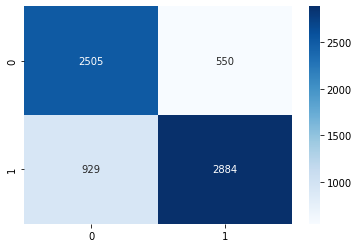

In [60]:
pred_df = prediction(lr_1,X_train_new_sm,y_train_new,0.4)

validating_lr(pred_df['real_op'],pred_df['pred_op'])

Accuracy Score 76.56926406926407
True Positive rate                         :82.7
False postive rate(predicting 1 when its 0):13.34




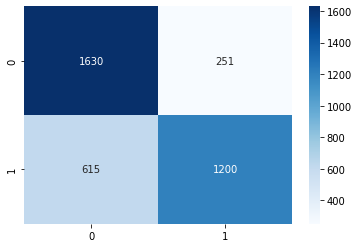

In [61]:
X_test_new    = X_test[fcol_list].copy()
X_test_new_sm = sm.add_constant(X_test_new )

#Predicting the values for MODEL NO 1
pred_df = prediction(lr_1,X_test_new_sm,y_test,0.4)

#Checking the Evaluation parameters
validating_lr(pred_df['real_op'],pred_df['pred_op'])

In [62]:
fcol_list = ['Lead Number', 'Lead Origin', 'Lead Source','TotalVisits', 
          'Total Time Spent on Website', 'Page Views Per Visit','Last Activity', 
          'Specialization','What is your current occupation',
          'Tags', 'Lead Profile', 'City','A free copy of Mastering The Interview', 
          'Last Notable Activity']

#Adding constants & model building
X_train_new_sm = sm.add_constant(X_train_new_sm[fcol_list])
lr   = sm.GLM(y_train_new,X_train_new_sm, family = sm.families.Binomial())
lr_2 = lr.fit() 
lr_2.summary()

Generalized Linear Model Regression Results 
 
 Dep. Variable: y No. Observations: 6868 
 
 
 Model: GLM Df Residuals: 6853 
 
 
 Model Family: Binomial Df Model: 14 
 
 
 Link Function: Logit Scale: 1.0000 
 
 
 Method: IRLS Log-Likelihood: -3217.8 
 
 
 Date: Fri, 26 May 2023 Deviance: 6435.7 
 
 
 Time: 14:32:05 Pearson chi2: 7.65e+03 
 
 
 No. Iterations: 5 Pseudo R-squ. (CS): 0.3619 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 const 0.0633 0.031 2.024 0.043 0.002 0.125 
 
 
 Lead Number 0.0915 0.032 2.891 0.004 0.029 0.154 
 
 
 Lead Origin 0.2339 0.036 6.577 0.000 0.164 0.304 
 
 
 Lead Source 0.4505 0.037 12.144 0.000 0.378 0.523 
 
 
 TotalVisits 0.0924 0.037 2.474 0.013 0.019 0.166 
 
 
 Total Time Spent on Website 1.1268 0.038 29.685 0.000 1.052 1.201 
 
 
 Page Views Per Visit -0.3778 0.041 -9.146 0.000 -0.459 -0.297 
 
 
 Last Activity 0.3986 0.050 7.907 0.000 0.300 0.497 
 
 
 Specialization -0.2592 0.037 -7.090 0.000 -0.331 -0.188 
 
 
 What is your current occupation 0.1441 0.034 4.243 0.000 0.078 0.211 
 
 
 Tags 0.3559 0.034 10.324 0.000 0.288 0.424 
 
 
 Lead Profile -0.9052 0.038 -23.911 0.000 -0.979 -0.831 
 
 
 City 0.2703 0.032 8.434 0.000 0.208 0.333 
 
 
 A free copy of Mastering The Interview -0.3190 0.036 -8.959 0.000 -0.389 -0.249 
 
 
 Last Notable Activity 0.1669 0.050 3.350 0.001 0.069 0.265

Accuracy Score 78.97495631916132
True Positive rate                         :77.17
False postive rate(predicting 1 when its 0):22.03




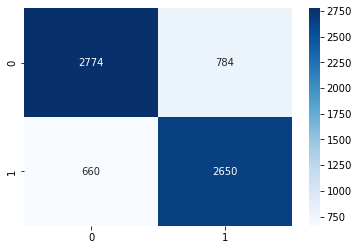

In [63]:
pred_df = prediction(lr_2,X_train_new_sm,y_train_new,0.5)

#Checking the evalution parameters 
validating_lr(pred_df['real_op'],pred_df['pred_op'])

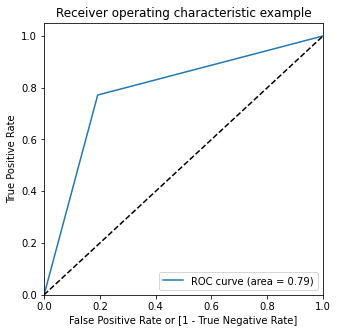

In [64]:
draw_roc(pred_df['real_op'],pred_df['pred_op'])

Accuracy Score 76.65043290043289
True Positive rate                         :82.77
False postive rate(predicting 1 when its 0):13.28




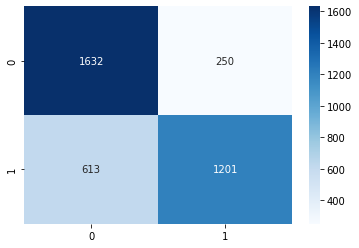

In [65]:
X_test_new    = X_test[fcol_list].copy()
X_test_new_sm = sm.add_constant(X_test_new )

pred_df = prediction(lr_2,X_test_new_sm,y_test,0.4)

#Checking the evalution parameters 
validating_lr(pred_df['real_op'],pred_df['pred_op'])

Accuracy Score 63.4469696969697
True Positive rate                         :94.35
False postive rate(predicting 1 when its 0):7.75




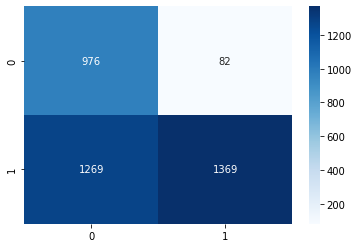

In [66]:
X_test_new    = X_test[fcol_list].copy()
X_test_new_sm = sm.add_constant(X_test_new )

pred_df = prediction(lr_2,X_test_new_sm,y_test,0.2)

#Checking the evalution parameters 
validating_lr(pred_df['real_op'],pred_df['pred_op'])